In [255]:
import pandas as pd
import matplotlib.pyplot as plt

In [256]:
data=pd.read_csv('Uber Request Data.csv')

### describing data so that we can know details of it.

In [257]:
data.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
Request id           6745 non-null int64
Pickup point         6745 non-null object
Driver id            4095 non-null float64
Status               6745 non-null object
Request timestamp    6745 non-null object
Drop timestamp       2831 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 316.2+ KB


### CHECKING FOR DUPLICATE ROWS BASED ON ALL COLUMNS

In [258]:

d=data[data.duplicated()]
d.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


### CHECKING FOR MISSING VALUES

In [259]:
#pICKUP POINT , REQUEST ID AND  TIME STAMP IS IMPORTANT

data['Pickup point'].isnull().sum()
data['Request id'].isnull().sum()
data['Request timestamp'].isnull().sum()

0

In [260]:
## Complete trip should have pickup, drop ,time stamp and request id
completed=data.loc[data['Status']=='Trip Completed']
completed.isnull().sum()

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
dtype: int64

In [261]:
## Cancelled trip should have request id , pickup point,driver id.
completed=data.loc[data['Status']=='Cancelled']
completed.isnull().sum() # no missing values for column which is important.

Request id              0
Pickup point            0
Driver id               0
Status                  0
Request timestamp       0
Drop timestamp       1264
dtype: int64

# Standardise timing columns 

### Standardise Pickup timing


In [262]:
data['Request timestamp'] = pd.to_datetime(data['Request timestamp'])

### Standardise Drop timing


In [263]:

data['Drop timestamp']=pd.to_datetime(data['Drop timestamp'])

### Adding New column for TIME SLOTS

In [264]:
data['Part of Day']=(data['Request timestamp'].dt.hour).apply(lambda x: 'Early Morning' if x in [4,5,6] else ('Morning' if x in [7,8,9] else ('Late Morning' if x in [10,11] else ('Afternoon' if x in [12,13,14] else ('Early Evening' if x in [15,16,17] else ('Late Evening' if x in [18,19,20] else ( 'Night' if x in [21,22,23] else ('Late Night' if x in [0,1,2,3] else None))))))))

# Analysis

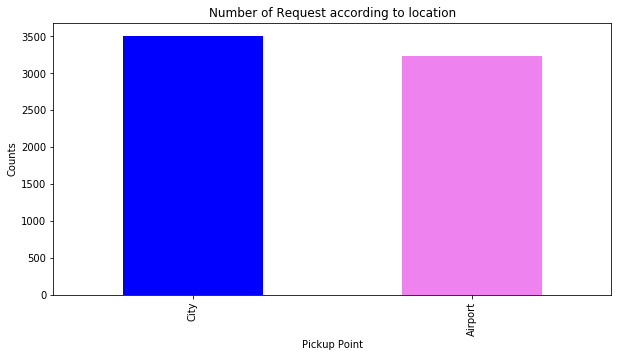

Number of Request from City:  3507
Number of Request from Airport:  3238


In [265]:

##Comparing number of request accoridng to pickup point
b=data['Pickup point'].value_counts().plot(kind='bar',figsize=(10,5),title='Number of Request according to location',color=['Blue','Violet'])
b.set_xlabel('Pickup Point')
b.set_ylabel('Counts')
plt.show()

print("Number of Request from City: ",len(data[data['Pickup point']=='City']))
print("Number of Request from Airport: ",len(data[data['Pickup point']=='Airport']))

### Checking Frequency of Status

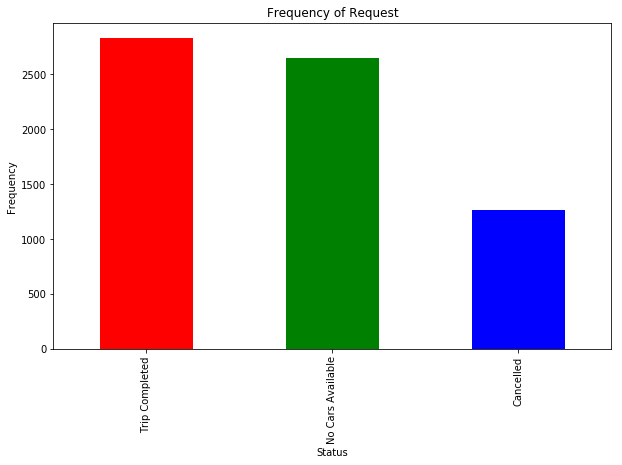

In [266]:


a=data['Status'].value_counts().plot(kind='bar',figsize=(10,6),title='Frequency of Request',color=['Red','Green','Blue'])
a.set_xlabel('Status')
a.set_ylabel('Frequency')
plt.show()

### Plot According to part of Day 

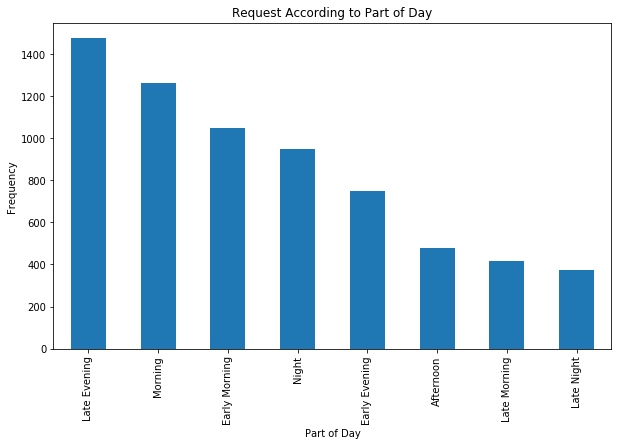


Number of Request in Early Morning: 1046

Number of Request in Morning: 1260

Number of Request in Late Morning: 414

Number of Request in Afternoon: 480

Number of Request in Early Evening: 748

Number of Request in Late Evening:  1475

Number of Request in Night:  947

Number of Request in Late Night:  375


In [267]:
d=data['Part of Day'].value_counts().plot(kind='bar',figsize=(10,6),title='Request According to Part of Day')
d.set_xlabel('Part of Day')
d.set_ylabel('Frequency')
plt.show()

#Number of Requests
print("\nNumber of Request in Early Morning:",len(data[data['Part of Day']=='Early Morning']))
print("\nNumber of Request in Morning:",len(data[data['Part of Day']=='Morning']))
print("\nNumber of Request in Late Morning:",len(data[data['Part of Day']=='Late Morning']))
print("\nNumber of Request in Afternoon:",len(data[data['Part of Day']=='Afternoon']))
print("\nNumber of Request in Early Evening:",len(data[data['Part of Day']=='Early Evening']))
print("\nNumber of Request in Late Evening: ",len(data[data['Part of Day']=='Late Evening']))
print("\nNumber of Request in Night: ",len(data[data['Part of Day']=='Night']))
print("\nNumber of Request in Late Night: ",len(data[data['Part of Day']=='Late Night']))


#  Time slots when the highest gap exists

In [268]:
a=data.loc[data['Part of Day']=='Early Morning']
b=data.loc[data['Part of Day']=='Morning']
c=data.loc[data['Part of Day']=='Late Morning']
d=data.loc[data['Part of Day']=='Afternoon']
e=data.loc[data['Part of Day']=='Early Evening']
f=data.loc[data['Part of Day']=='Late Evening']
g=data.loc[data['Part of Day']=='Night']
h=data.loc[data['Part of Day']=='Late Night']


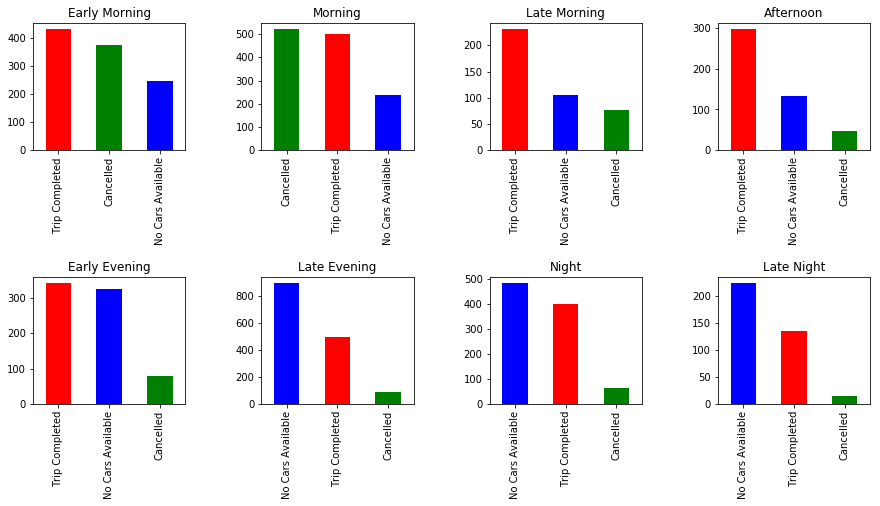

In [269]:
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,7)
fig.subplots_adjust(wspace=0.5,hspace=1)

a['Status'].value_counts().plot(ax=ax[0,0],kind='bar',title='Early Morning',color=['Red','Green','Blue'])
b['Status'].value_counts().plot(ax=ax[0,1],kind='bar',title='Morning',color=['Green','Red','Blue'])
c['Status'].value_counts().plot(ax=ax[0,2],kind='bar',title='Late Morning',color=['Red','Blue','Green'])
d['Status'].value_counts().plot(ax=ax[0,3],kind='bar',title='Afternoon',color=['Red','Blue','Green'])
e['Status'].value_counts().plot(ax=ax[1,0],kind='bar',title='Early Evening',color=['Red','Blue','Green'])
f['Status'].value_counts().plot(ax=ax[1,1],kind='bar',title='Late Evening',color=['Blue','Red','Green'])
g['Status'].value_counts().plot(ax=ax[1,2],kind='bar',title='Night',color=['Blue','Red','Green'])
h['Status'].value_counts().plot(ax=ax[1,3],kind='bar',title='Late Night',color=['Blue','Red','Green'])


In [270]:
print("------Demand gap of early Morning------")
print("\n Number of Request By Customer: ",len(a))
print("\n Number of Supply by Uber",len(a[a['Status']=='Trip Completed']))
print("\n Demand Gap: ",len(a)-len(a[a['Status']=='Trip Completed']))


print("\n------Demand gap of Morning------")
print("\n Number of Request By Customer: ",len(b))
print("\n Number of Supply by Uber",len(b[b['Status']=='Trip Completed']))
print("\n Demand Gap: ",len(b)-len(b[b['Status']=='Trip Completed']))

print("\n------Demand gap of early Late Morning------")
print("\n Number of Request By Customer: ",len(c))
print("\n Number of Supply by Uber",len(c[c['Status']=='Trip Completed']))
print("\n Demand Gap: ",len(c)-len(c[c['Status']=='Trip Completed']))


print("\n------Demand gap of early Afternoon------")
print("\n Number of Request By Customer: ",len(d))
print("\n Number of Supply by Uber",len(d[d['Status']=='Trip Completed']))
print("\n Demand Gap: ",len(d)-len(d[d['Status']=='Trip Completed']))


print("\n------Demand gap of early Early Evening------")
print("\n Number of Request By Customer: ",len(e))
print("\n Number of Supply by Uber",len(e[e['Status']=='Trip Completed']))
print("\n Demand Gap: ",len(e)-len(e[e['Status']=='Trip Completed']))


print("\n------Demand gap of early Late Evening------")
print("\n Number of Request By Customer: ",len(f))
print("\n Number of Supply by Uber",len(f[f['Status']=='Trip Completed']))
print("\n Demand Gap: ",len(f)-len(f[f['Status']=='Trip Completed']))


print("\n------Demand gap of early Night------")
print("\n Number of Request By Customer: ",len(g))
print("\n Number of Supply by Uber",len(g[g['Status']=='Trip Completed']))
print("\n Demand Gap: ",len(g)-len(g[g['Status']=='Trip Completed']))



print("\n------Demand gap of early Late Night------")
print("\n Number of Request By Customer: ",len(h))
print("\n Number of Supply by Uber",len(h[h['Status']=='Trip Completed']))
print("\n Demand Gap: ",len(h)-len(h[h['Status']=='Trip Completed']))

------Demand gap of early Morning------

 Number of Request By Customer:  1046

 Number of Supply by Uber 430

 Demand Gap:  616

------Demand gap of Morning------

 Number of Request By Customer:  1260

 Number of Supply by Uber 502

 Demand Gap:  758

------Demand gap of early Late Morning------

 Number of Request By Customer:  414

 Number of Supply by Uber 231

 Demand Gap:  183

------Demand gap of early Afternoon------

 Number of Request By Customer:  480

 Number of Supply by Uber 298

 Demand Gap:  182

------Demand gap of early Early Evening------

 Number of Request By Customer:  748

 Number of Supply by Uber 344

 Demand Gap:  404

------Demand gap of early Late Evening------

 Number of Request By Customer:  1475

 Number of Supply by Uber 491

 Demand Gap:  984

------Demand gap of early Night------

 Number of Request By Customer:  947

 Number of Supply by Uber 399

 Demand Gap:  548

------Demand gap of early Late Night------

 Number of Request By Customer:  375

 N

# Explaination
   From above Visualization we can see that demand gap in Late Evening is more which is 984

# Types of requests (city-airport or airport-city) for which the gap is the most 

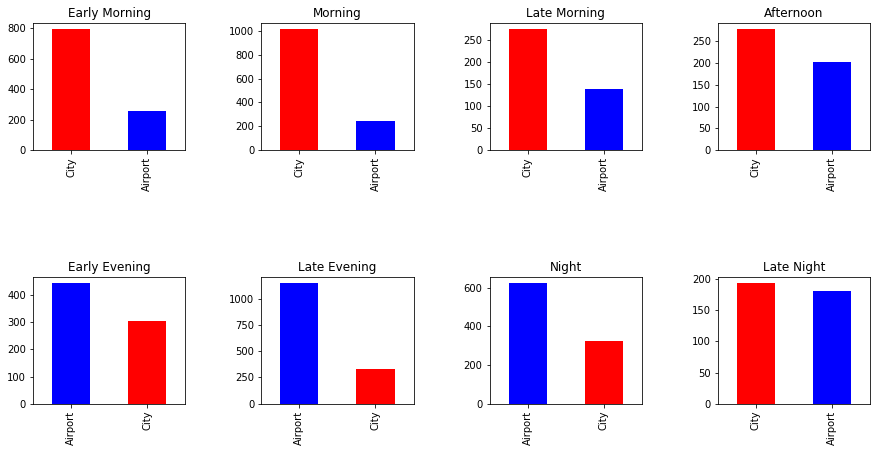

In [271]:
fig,ax=plt.subplots(2,4)
fig.set_size_inches(15,7)
fig.subplots_adjust(wspace=0.5,hspace=1)

a['Pickup point'].value_counts().plot(ax=ax[0,0],kind='bar',title='Early Morning',color=['Red','Blue'])
b['Pickup point'].value_counts().plot(ax=ax[0,1],kind='bar',title='Morning',color=['Red','Blue'])
c['Pickup point'].value_counts().plot(ax=ax[0,2],kind='bar',title='Late Morning',color=['Red','Blue'])
d['Pickup point'].value_counts().plot(ax=ax[0,3],kind='bar',title='Afternoon',color=['Red','Blue'])
e['Pickup point'].value_counts().plot(ax=ax[1,0],kind='bar',title='Early Evening',color=['Blue','Red'])
f['Pickup point'].value_counts().plot(ax=ax[1,1],kind='bar',title='Late Evening',color=['Blue','Red'])
g['Pickup point'].value_counts().plot(ax=ax[1,2],kind='bar',title='Night',color=['Blue','Red'])
h['Pickup point'].value_counts().plot(ax=ax[1,3],kind='bar',title='Late Night',color=['Red','Blue'])

In [272]:

#Seprating data of City and Airport
m=data.loc[data['Pickup point']=='City']
n=data.loc[data['Pickup point']=='Airport']


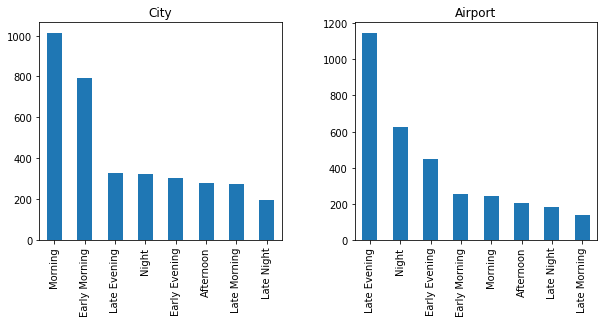

In [273]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(10,4)
fig.subplots_adjust(wspace=0.3,hspace=1)


m['Part of Day'].value_counts().plot(ax=ax[0],kind='bar',title='City')
n['Part of Day'].value_counts().plot(ax=ax[1],kind='bar',title='Airport')

In [274]:
print("\n --------------City--------------")
print("\n Trip Completed:",len(m[m['Status']=='Trip Completed']))
print("\n No Car Available:",len(m[m['Status']=='No Cars Available']))
print("\n Cancelled:",len(m[m['Status']=='Cancelled']))


print("\n --------------Airport--------------")
print("\n Trip Completed:",len(n[n['Status']=='Trip Completed']))
print("\n No Car Available:",len(n[n['Status']=='No Cars Available']))
print("\n Cancelled:",len(n'Green',[n['Status']=='Cancelled']))

SyntaxError: invalid syntax (<ipython-input-274-25a20e73f46d>, line 10)

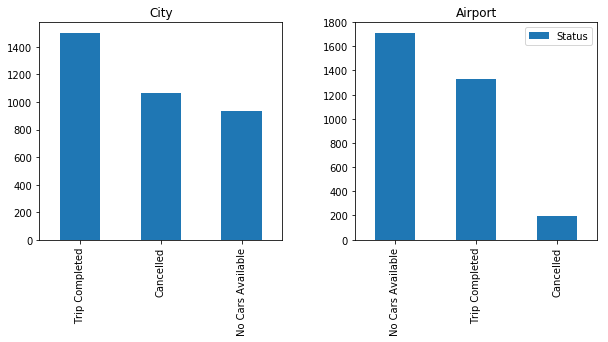

In [275]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(10,4)
fig.subplots_adjust(wspace=0.3,hspace=1)

y=[1504,937,1066]
m['Status'].value_counts().plot(ax=ax[0],kind='bar',title='City')
n['Status'].value_counts().plot(ax=ax[1],kind='bar',title='Airport')
plt.legend()

# SHOWING PERCENTAGE THROUGH PIE CHART

[None, None]

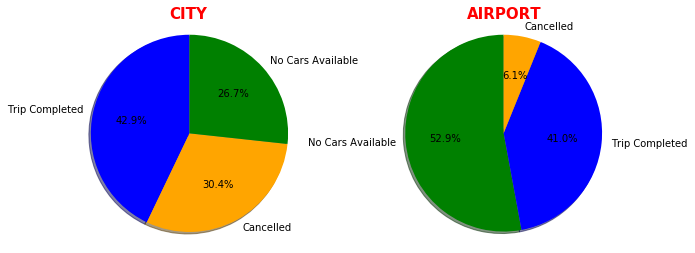

In [276]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(10,4)
fig.subplots_adjust(wspace=0.3,hspace=1)

ax[0].pie(m['Status'].value_counts(),autopct='%1.1f%%',labels=['Trip Completed','Cancelled','No Cars Available'],colors=['Blue','Orange','Green'],shadow=True, startangle=90)
d=ax[0].set_title("CITY")
plt.setp(d, size=15, weight="bold",color='RED')

ax[0].axis('equal')
ax[1].pie(n['Status'].value_counts(),autopct='%1.1f%%',labels=['No Cars Available','Trip Completed','Cancelled'],colors=['Green','Blue','Orange'],shadow=True, startangle=90)
c=ax[1].set_title("AIRPORT")
ax[1].axis('equal')
plt.setp(c, size=15, weight="bold",color='RED')


### Request Gap Between City and Airport

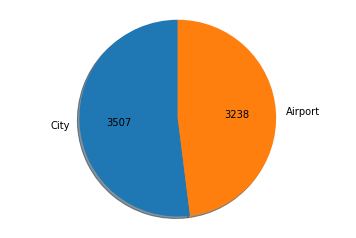

In [277]:
fig1, ax1 = plt.subplots()
ax1.pie(data['Pickup point'].value_counts(),labels=['City','Airport'],autopct=lambda p: '{:.0f}'.format(p * len(data) / 100),shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

# Explaination

There is a high demand for cabs from City to Airport in the Early Morning and Morning hours
There is a high demand for cabs from Airport to City in the Late Evening
However the vice versa is not true
This shows that there are more outbound flights in the Mornings and inbound flights in the evening
Rest of the times there is quite less demand to and from Airport and this reason for gap.


# Solution

To control revenue loss we can follow some idea:


1.As from visualization we saw that there is more cancelliation in Early Morning and Morning for this company should give bonus to that drivers who will drive in this time slots so from this we can save revenue. From one ride company can get that much money that they can provie bonus for drivers monthly. Bonus will depend on number of trip driver completed in this time slots.

2. As from above visualizaton we saw that No cars available in Early Evening is less as compare to late evening to late night .It is because: Normally people want free from work after Early Evening that is why many drivers log out from their account after this time. For this company should increase price of ride in this time slots and they should give this extra money to dirver so company can save their revenue.

3.As from above visualizaton we saw that Available of car is less as compare to City on Airport.It is just because when cab go to Airport then after completeing the ride they have to wait for long time to get a new ride that is why they do not stay there. So less number of car is available on Airport.We can resolve it by connecting with Airports. If Uber will get data of that Airprot then driver will get details of every flights which are arriving and that time the nearest Uber cab can know the details and they can go to Airport and it will become easy for them.